In [1]:
import numpy as np 
import pandas as pd
import os
import joblib
import sklearn 
import matplotlib
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

#Regressions:

from sklearn.multioutput import MultiOutputRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#Metric
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


from pandas import DataFrame


# Show progress bar
from tqdm import tqdm

In [2]:
df = pd.read_csv('flo_dataset_augmented.csv')
df

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,...,x5_zinc undecylenate,x6_None,x6_copper bromide,x6_trioctylphosphine,x6_water,x6_zinc iodide,diameter_nm,abs_nm,emission_nm,Unnamed: 63
0,0,0,0,0,0.713177,0.328895,-0.453863,-0.453709,-0.297521,-0.749374,...,0,1,0,0,0,0,6.7000,622,680.000000,58.000000
1,1,1,1,1,-0.336633,-0.477469,-0.453863,-0.453709,-0.076698,-0.749374,...,0,1,0,0,0,0,1.5000,445,568.000000,123.000000
2,2,2,2,2,0.713177,0.328895,-0.453863,-0.453709,-0.076698,-0.749374,...,0,1,0,0,0,0,2.5000,543,589.000000,46.000000
3,3,5,5,5,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,...,0,1,0,0,0,0,3.6750,431,590.944444,159.944444
4,4,6,6,6,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,...,0,1,0,0,0,0,3.7500,432,590.944444,158.944444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,142,152,152,152,-0.730311,-0.779855,-0.453863,-0.085147,-0.394734,-0.678852,...,0,1,0,0,0,0,2.8015,500,550.000000,50.000000
143,143,153,153,153,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,8.3000,532,590.000000,58.000000
144,144,154,154,154,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,3.0745,549,590.944444,41.944444
145,145,155,155,155,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,...,0,1,0,0,0,0,3.1795,562,590.944444,28.944444


In [3]:
# Input for ML models


input_col = ['in_amount_mmol',
             'p_amount_mmol',
             'ligand_amount_mmol',
             'first_sol_amount_ml',
             'second_sol_amount_ml',
             'other_1_amount_mmol',
             'other_2_amount_mmol',
             'total_volume_ml',
             'temp_c',
             'time_min',
             'x0_indium acetate',
             'x0_indium bromide',
             'x0_indium chloride',
             'x0_indium iodide',
             'x0_indium myristate',
             'x0_indium trifluoroacetate',
             'x1_bis(trimethylsilyl)phosphine',
             'x1_phosphorus trichloride',
             'x1_tris(diethylamino)phosphine',
             'x1_tris(dimethylamino)phosphine',
             'x1_tris(trimethylgermyl)phosphine',
             'x1_tris(trimethylsilyl)phosphine',
             'x2_None',
             'x2_lauric acid',
             'x2_myristic acid',
             'x2_oleic acid',
             'x2_palmitic acid',
             'x2_stearic acid',
             'x3_dodecylamine',
             'x3_octadecene',
             'x3_oleylamine',
             'x3_trioctylamine',
             'x3_trioctylphosphine',
             'x4_None',
             'x4_dioctyl ether',
             'x4_dioctylamine',
             'x4_hexadecylamine',
             'x4_octylamine',
             'x4_oleylamine',
             'x4_toluene',
             'x4_trioctylphosphine',
             'x4_trioctylphosphine oxide',
             'x5_None',
             'x5_acetic acid',
             'x5_superhydride',
             'x5_tetrabutylammonium myristate',
             'x5_zinc bromide'
             ,'x5_zinc chloride'
             ,'x5_zinc iodide'
             ,'x5_zinc oleate',
             'x5_zinc stearate',
             'x5_zinc undecylenate',
             'x6_None',
             'x6_copper bromide',
             'x6_trioctylphosphine',
             'x6_water',
             'x6_zinc iodide'
            ]

output_col = ['diameter_nm', 'abs_nm', 'emission_nm']

X = df[input_col]

Y = df[output_col]

In [4]:
# Splitting dataset for training

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=45, shuffle=True)

In [5]:
Y.shape

(147, 3)

In [6]:
X.shape

(147, 57)

In [7]:
#This is used to roughly show which regression performs better.
# Testing Regressions:

REGRESSIONS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10,
                                       max_features=32,     
                                       random_state=44),
    "K-nn": KNeighborsRegressor(),                          
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(random_state=0),
    "RandomForestRegressor": RandomForestRegressor(max_depth=4, random_state=2),
    "Decision Tree Regressor":DecisionTreeRegressor(max_depth=5),
    "MultiO/P GBR" :MultiOutputRegressor(GradientBoostingRegressor(n_estimators=5)),
    "MultiO/P AdaB" :MultiOutputRegressor(AdaBoostRegressor(n_estimators=5))
            }
# r2 is used to evaluate the performance of all regressions.

r2_list = list()

for name, reg in REGRESSIONS.items():     
    reg.fit(X_train, Y_train)                 
    Y_pred = pd.DataFrame(reg.predict(X_test))
    
    print(name, '\n')
    
# This loop will show r2 for each outcome
    for column in range(0, 3):
        r2 = r2_score(Y_test.iloc[:, column], Y_pred.iloc[:, column])
        r2_list.append(r2)
    
    print(' R^2 for diameter is ', r2_list[0], '\n',
          'R^2 for Absorbance is ', r2_list[1], '\n',
          'R^2 for PL is ', r2_list[2], '\n', '\n', 
         )
    del r2_list[:] #reset the list for the next regression

Extra trees 

 R^2 for diameter is  -0.15610853335763308 
 R^2 for Absorbance is  0.6644915668226462 
 R^2 for PL is  0.5243697431893675 
 

K-nn 

 R^2 for diameter is  0.5147860808077422 
 R^2 for Absorbance is  0.43202241991052615 
 R^2 for PL is  0.5043564943997824 
 

Linear regression 

 R^2 for diameter is  -849.4632369189685 
 R^2 for Absorbance is  -400.43099791580386 
 R^2 for PL is  -816.481211496823 
 

Ridge 

 R^2 for diameter is  0.28630060795093615 
 R^2 for Absorbance is  0.35394807249057614 
 R^2 for PL is  0.5196940552279993 
 

Lasso 

 R^2 for diameter is  -0.08164251072932793 
 R^2 for Absorbance is  0.3979986804184664 
 R^2 for PL is  0.455090783848076 
 

ElasticNet 

 R^2 for diameter is  -0.08164251072932793 
 R^2 for Absorbance is  0.27652438873155005 
 R^2 for PL is  0.20064008349225737 
 

RandomForestRegressor 

 R^2 for diameter is  0.29490682987274186 
 R^2 for Absorbance is  0.1762580549328393 
 R^2 for PL is  -0.005379537612182794 
 

Decision Tree Reg

## Optimizing


### 1. Extra Trees

In [8]:
# This is a grid search for three parameters in the Extra Trees algorithm. 
# Parameters are: random_state, n_estimators, max_features.

# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 25)):
    for j in range(1, 25):
        for k in range(2, 50, 1):
            ET_regr = ExtraTreesRegressor(n_estimators=i, 
                                            max_features=j,
                                            random_state=k)
            
            ET_regr.fit(X_train, Y_train)
            ET_Y_pred = pd.DataFrame(ET_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, ET_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 24/24 [08:54<00:00, 22.28s/it]

8.560256040579713 1 15 18


In [36]:

ET_regr = ExtraTreesRegressor(n_estimators=5,
                            max_features=5,     
                            random_state=13).fit(X_train, Y_train)
            
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE, '; MAE:', ET_MAE )

diameter:  r2: 0.15632289902327157 ; MSE: 0.19851516645572106 ; RMSE: 0.4455504084340189 ; MAE: 0.2875959595212121
absorbance:  r2: 0.8638710887637 ; MSE: 292.41115151515163 ; RMSE: 17.100033670000524 ; MAE: 12.984242424242428
emission:  r2: 0.7190057119245465 ; MSE: 417.45159090909084 ; RMSE: 20.431632115645847 ; MAE: 14.250000000000004


### 2. Decision Tree 

In [9]:
# This is a grid search for three parameters in the Decision Trees algorithm. 
# Parameters are: max_depth, max_features, random_state.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999

min_i, min_j, min_k  = 0, 0, 0

for i in tqdm(range(1, 21)):
    for j in range(1, 21):
        for k in range(5, 80, 5):
            
            DT_regr = DecisionTreeRegressor(max_depth=i,
                                max_features=j,
                                random_state=k)
            
            DT_regr.fit(X_train, Y_train)
            DT_Y_pred = pd.DataFrame(DT_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, DT_Y_pred)
            
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 20/20 [00:43<00:00,  2.19s/it]

9.462839667193675 17 5 10


In [28]:
DT_regr = DecisionTreeRegressor(max_depth=18,
                                max_features=1,
                                random_state=15)
            
DT_regr.fit(X_train, Y_train)            
DT_Y_pred = DT_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    DT_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    DT_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i], squared=False)
    DT_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(DT_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', DT_r2, '; MSE:', DT_MSE, '; RMSE:', DT_RMSE, '; MAE:', DT_MAE )

diameter:  r2: -0.3810057940523248 ; MSE: 0.3249472988720771 ; RMSE: 0.570041488728739 ; MAE: 0.3767854095492929
absorbance:  r2: 0.6979525123760519 ; MSE: 648.8118715286198 ; RMSE: 25.471785793866513 ; MAE: 17.92183838383839
emission:  r2: 0.45210316615914947 ; MSE: 813.9681646464649 ; RMSE: 28.530127315637145 ; MAE: 18.947777777777773


### 3. Random Forest

In [10]:
# This is a grid search for three parameters in the Random Forest algorithm. 
# Parameters are: max_depth, n_estimators, max_features.
# Random_state is set to 45.
# This gives the best combination of the three parameters for the smallest mean squared error.

min_mae = 99999
min_i, min_j, min_k = 0, 0, 0
for i in tqdm(range(1, 29)):
    for j in range(1, 29):
        for k in range(2, 50, 2):
            RF_regr = RandomForestRegressor(max_depth=i, 
                                            n_estimators=j, 
                                            max_features=k,
                                            random_state=45)
            RF_regr.fit(X_train, Y_train)
            RF_Y_pred = pd.DataFrame(RF_regr.predict(X_test))

            mae = mean_absolute_error(Y_test, RF_Y_pred)
            if (min_mae > mae):
                min_mae = mae
                min_i = i
                min_j = j
                min_k = k
            
print(min_mae, min_i, min_j, min_k)

100%|██████████| 28/28 [07:59<00:00, 17.14s/it]

11.065622930639732 9 1 34


In [31]:
RF_regr = RandomForestRegressor(max_depth=14, 
                                n_estimators=8, 
                                max_features=20,
                                random_state=45)
            
RF_regr.fit(X_train, Y_train)            
RF_Y_pred = RF_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    RF_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    RF_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i], squared=False)
    RF_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(RF_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', RF_r2, '; MSE:', RF_MSE, '; RMSE:', RF_RMSE, '; MAE:', RF_MAE )

diameter:  r2: 0.2382527141514139 ; MSE: 0.17923728055717011 ; RMSE: 0.42336424099960324 ; MAE: 0.33303858015602905
absorbance:  r2: 0.8504086062401859 ; MSE: 321.3291820878051 ; RMSE: 17.92565708942925 ; MAE: 14.171117424242423
emission:  r2: 0.7097117794326309 ; MSE: 431.25887123184975 ; RMSE: 20.76677325035957 ; MAE: 16.342582070707067


### 4. K Neighbors

In [11]:
min_mae = 99999
min_i, min_j = 0, 0

for i in tqdm(range(1, 40)):
    for j in range(1, 40):

        KNN_reg = KNeighborsRegressor(n_neighbors=i, 
                                      p=j).fit(X_train, Y_train)

        KNN_Y_pred = KNN_reg.predict(X_test)

        mae = mean_absolute_error(Y_test, KNN_Y_pred)

        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

print(min_mae, min_i, min_j)

100%|██████████| 39/39 [00:17<00:00,  2.23it/s]

10.966030597101451 1 2


In [33]:
KNN_reg = KNeighborsRegressor(n_neighbors=2, 
                              p=5).fit(X_train, Y_train)

KNN_Y_pred = KNN_reg.predict(X_test)

outputs = ('diameter:', 'Abs:', 'PL:')
for i in range(0, 3):
    KNN_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    KNN_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i], squared=False)
    KNN_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(KNN_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', KNN_r2, '; MSE:', KNN_MSE, '; RMSE:', KNN_RMSE, '; MAE:', KNN_MAE)

diameter: r2: 0.06897807678515755 ; MSE: 0.21906719033496447 ; RMSE: 0.468046141245673 ; MAE: 0.33632996621212125
Abs: r2: 0.7070064320530501 ; MSE: 629.3636363636364 ; RMSE: 25.087120926157237 ; MAE: 18.515151515151516
PL: r2: 0.5597857580167673 ; MSE: 653.9924242424242 ; RMSE: 25.57327558687827 ; MAE: 17.53030303030303


### 5. Lasso

In [54]:
min_mae = 9999

min_i, min_j = 0, 0

for i in tqdm(np.arange(0.1, 2.0, 0.02)):
    for j in range(1, 100):
        L_reg = Lasso(alpha=i, random_state=j).fit(X_train, Y_train)
        
        L_Y_pred = L_reg.predict(X_test)
        L_r2 = r2_score(Y_test, pd.DataFrame(L_Y_pred))
      
        if (min_mae > mae):
            min_mae = mae
            min_i = i
            min_j = j

            
print(min_mae, min_i, min_j)

  0%|          | 0/95 [00:00<?, ?it/s]/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 593.291900984419, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.9219423076429, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/lin

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.49652915023034, tolerance: 49.637031546542566
  model = cd_fast.enet_coordinate_descent(
/home/anhhaokudo/miniconda3/lib/python3.8/site-packages/sklearn/

18.478823529411766 0.1 1


### Saving Extra Trees model

In [12]:
ET_regr = ExtraTreesRegressor(n_estimators=1,
                            max_features=15,     
                            random_state=18).fit(X_train, Y_train)

ET_Y_pred = ET_regr.predict(X_test)

joblib.dump(ET_regr, "./model_MO_ExtraTrees.joblib")

['./model_MO_ExtraTrees.joblib']

## Analyzing

In [13]:
ET_regr = ExtraTreesRegressor(n_estimators=1,
                            max_features=15,     
                            random_state=18).fit(X_train, Y_train)
ET_regr.fit(X_train, Y_train)            
ET_Y_pred = ET_regr.predict(X_test)

outputs = ('diameter: ', 'absorbance: ', 'emission: ')

for i in range(0, 3):
    ET_r2 = r2_score(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_MSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    ET_RMSE = mean_squared_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i], squared=False)
    ET_MAE = mean_absolute_error(Y_test.iloc[:, i], pd.DataFrame(ET_Y_pred).loc[:, i])
    print(outputs[i], 'r2:', ET_r2, '; MAE:', ET_MAE, '; MSE:', ET_MSE, '; RMSE:', ET_RMSE )

diameter:  r2: 0.2530692571721612 ; MAE: 0.4996086956521739 ; MSE: 0.7308155217391301 ; RMSE: 0.8548774893159429
absorbance:  r2: 0.8511338509795856 ; MAE: 17.91304347826087 ; MSE: 503.4782608695652 ; RMSE: 22.438321257829543
emission:  r2: 0.8769559417856179 ; MAE: 7.268115947826093 ; MSE: 176.76851868148168 ; RMSE: 13.295432248764298


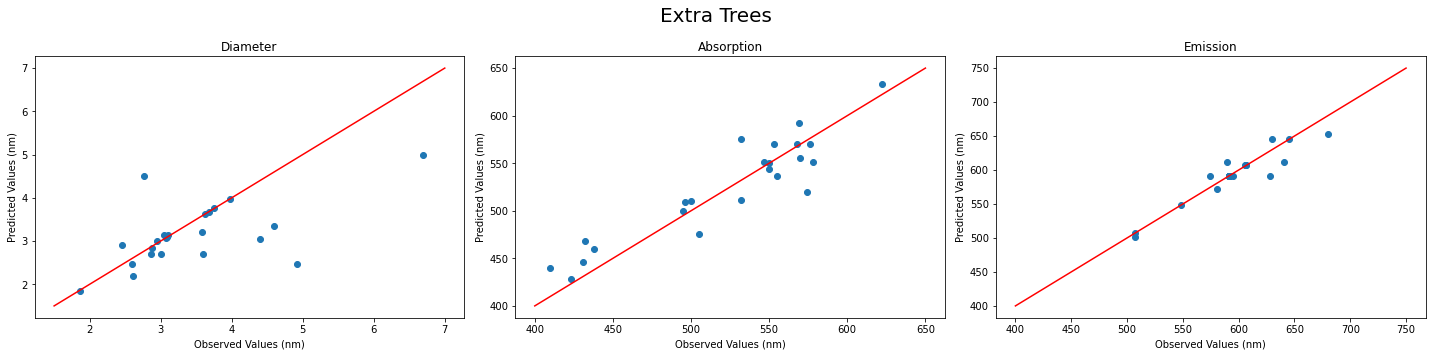

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,5))
fig.suptitle('Extra Trees', fontsize=20)

ax1.plot(Y_test.iloc[:, 0], pd.DataFrame(ET_Y_pred).loc[:, 0],'o')
ax1.plot([1.5,7],[1.5,7], color = 'r')
ax1.set_title('Diameter')
ax1.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax2.plot(Y_test.iloc[:, 1], pd.DataFrame(ET_Y_pred).loc[:, 1],'o')
ax2.plot([400,650],[400,650], color = 'r')
ax2.set_title('Absorption')
ax2.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')

ax3.plot(Y_test.iloc[:, 2], pd.DataFrame(ET_Y_pred).loc[:, 2],'o')
ax3.plot([400,750],[400,750], color = 'r')
ax3.set_title('Emission')
ax3.set(xlabel='Observed Values (nm)', ylabel='Predicted Values (nm)')
fig.tight_layout()

In [17]:
importance_dict = dict()
for i in range(0,57):
    importance_dict[input_col[i]] = ET_regr.feature_importances_[i]

sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

top5 = DataFrame(sorted_importance[0:5], columns=['features', 'importance score'])

others = DataFrame(sorted_importance[5:], columns=['features', 'importance score'])

combined_others = pd.DataFrame(data = {
    'features' : ['others'],
    'importance score' : [others['importance score'].sum()]
})

#combining top 5 with others
imp_score = pd.concat([top5, combined_others])

sorted_importance


[('temp_c', 0.12114453714886851),
 ('time_min', 0.11746936510125543),
 ('other_1_amount_mmol', 0.09374045596299933),
 ('x4_oleylamine', 0.08793436409423414),
 ('x5_zinc chloride', 0.07961716498310455),
 ('x1_tris(trimethylsilyl)phosphine', 0.07410672084090043),
 ('x4_None', 0.07141878719497657),
 ('x5_zinc oleate', 0.04107311095250642),
 ('x6_copper bromide', 0.037080278894870325),
 ('x0_indium iodide', 0.03620593578416178),
 ('in_amount_mmol', 0.03564917334429397),
 ('ligand_amount_mmol', 0.03175298780329466),
 ('x4_trioctylphosphine', 0.021428777708433662),
 ('x2_stearic acid', 0.019787153305024598),
 ('p_amount_mmol', 0.016060936348547963),
 ('x2_myristic acid', 0.014337127419016422),
 ('x5_zinc undecylenate', 0.013581886518376177),
 ('total_volume_ml', 0.011034719534814972),
 ('x0_indium myristate', 0.00955369563584048),
 ('first_sol_amount_ml', 0.008761985178793081),
 ('x1_tris(trimethylgermyl)phosphine', 0.007908734047965958),
 ('x6_water', 0.007032321503579063),
 ('x2_None', 0.0

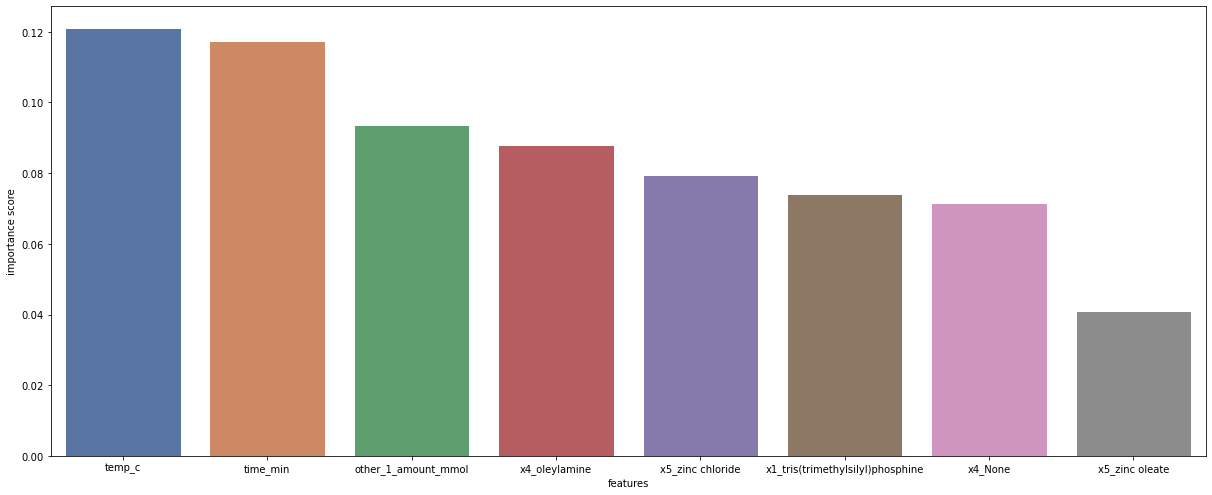

In [18]:
top7 = DataFrame(sorted_importance[0:8], columns=['features', 'importance score'])

others2 = DataFrame(sorted_importance[8:], columns=['features', 'importance score'])

# combined_others2 = pd.DataFrame(data = {
#     'features' : ['others'],
#     'importance score' : [others2['importance score'].sum()]
# })

# #combining top 10 with others
# imp_score2 = pd.concat([top7, combined_others2])

import seaborn as sns

a4_dims = (20.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set_theme(style="whitegrid")

ax = sns.barplot(x="features", y="importance score", data=top7)

In [19]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [22]:
FeatureMatrix = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min']

Output = ['diameter_nm', 'emission_nm', 'abs_nm']

FeatureMatrix_and_outputs = ['in_amount_mmol', 'p_amount_mmol', 'ligand_amount_mmol',
       'first_sol_amount_ml', 'second_sol_amount_ml', 
       'other_1_amount_mmol', 'other_2_amount_mmol', 'total_volume_ml',
       'temp_c', 'time_min','diameter_nm', 'emission_nm', 'abs_nm']
df_corr = df[FeatureMatrix_and_outputs]
df_corr

,in_amount_mmol,p_amount_mmol,ligand_amount_mmol,first_sol_amount_ml,second_sol_amount_ml,other_1_amount_mmol,other_2_amount_mmol,total_volume_ml,temp_c,time_min,diameter_nm,emission_nm,abs_nm
0,0.713177,0.328895,-0.453863,-0.453709,-0.297521,-0.749374,-0.18627,-0.447720,-0.694687,6.731028,6.7000,680.000000,622
1,-0.336633,-0.477469,-0.453863,-0.453709,-0.076698,-0.749374,-0.18627,-0.426587,-0.694687,-0.357533,1.5000,568.000000,445
2,0.713177,0.328895,-0.453863,-0.453709,-0.076698,-0.749374,-0.18627,-0.426587,-0.694687,-0.120118,2.5000,589.000000,543
3,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,-0.18627,-0.229122,-1.289515,-0.382971,3.6750,590.944444,431
4,-0.599085,-0.679060,-0.197558,-0.219170,-0.266618,-0.749374,-0.18627,-0.229122,-1.289515,-0.137076,3.7500,590.944444,432
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,-0.730311,-0.779855,-0.453863,-0.085147,-0.394734,-0.678852,-0.18627,-0.118160,1.897062,-0.221867,2.8015,550.000000,500
143,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,-0.18627,-0.210577,1.259747,1.643544,8.3000,590.000000,532
144,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,-0.18627,-0.210577,1.259747,0.626047,3.0745,590.944444,549
145,-0.717189,-0.779855,-0.344018,-0.185664,-0.394734,-0.749374,-0.18627,-0.210577,1.259747,0.117298,3.1795,590.944444,562


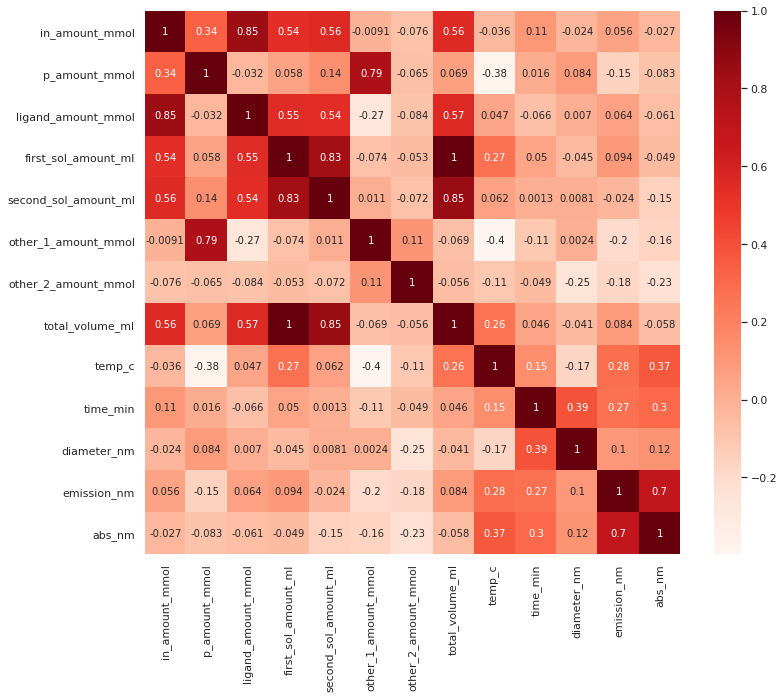

In [23]:

X_cor = df[FeatureMatrix]  #Feature Matrix
y_cor = df[Output]          #Target Variable

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_corr.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [14]:
#Correlation with output variable
cor_target = abs(cor['diameter_nm'])+abs(cor['emission_nm'])+abs(cor['abs_nm'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features.sort_values()

total_volume_ml         0.103975
first_sol_amount_ml     0.106628
second_sol_amount_ml    0.119982
ligand_amount_mmol      0.171658
third_sol_amount_ml     0.207125
in_amount_mmol          0.301733
p_amount_mmol           0.417005
other_1_amount_mmol     0.482492
other_2_amount_mmol     0.540417
temp_c                  0.660389
time_min                0.902663
diameter_nm             1.598087
emission_nm             2.174493
abs_nm                  2.222409
dtype: float64